In [1]:
import sys
sys.path.append("/home/alex/Documents/Doktorarbeit/PiezoHysteresis/python")

import hdf5_tools as h5
from alex_lib import f2t,t2f,matplot, vec2matMH
import numpy as np

import matplotlib.pyplot as plt

from os import listdir


Testcase:
```
Sketch of Problem:
```Sketch of Problem
######## -> S_N: chargeDensity = 0.0001 in 1th Harmonic
|      |
|      |
######## -> S_S: Ground
```

This is a easy setup, since the electric field lines only doing straight from top to bottom:
* Permittivity should be the same for all elements
* Electric flux density is constant over space
* Electric flux density is known: $D=-RHS$

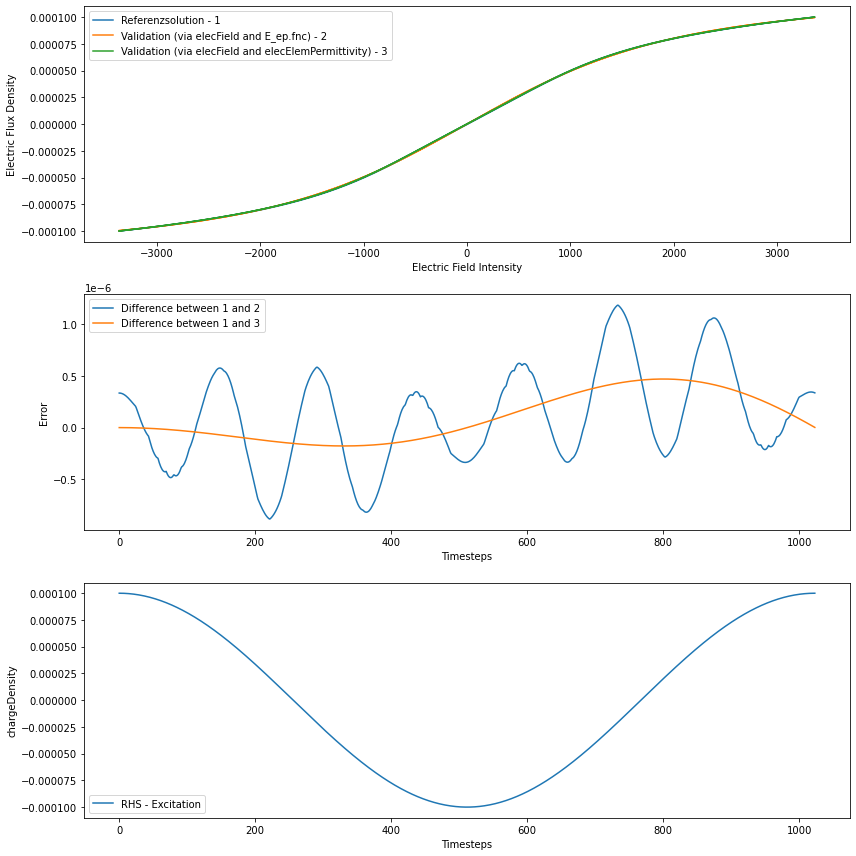

In [2]:
file_exp=listdir("results_hdf5/")[0]
#Nodenumber which is compared
Node=3
#Number of timesteps
Nt=2**10
t=np.linspace(0,2*np.pi,Nt)
#chargeDensity we apply via RHS:
RHS=0.0001 * np.cos(t)

#Obtaining elecPotential for Node
elecPot=h5.get_result("results_hdf5/"+file_exp,"elecPotential",step="all")[:,Node]
#Obtaining elecField in y-direction
elecField=h5.get_result("results_hdf5/"+file_exp,"elecFieldIntensity",step="all")[:,1]
elecField_t=f2t(elecField,Nt)
#Obtaining epsilon
epsilon=h5.get_result("results_hdf5/"+file_exp,"elecElemPermittivity",step="all")
epsilon_mat=vec2matMH(epsilon)

#Obtain Material law:
E_ep=np.genfromtxt("E_ep.fnc", delimiter=" ")
# mirror it around the 0Point and interpolate the values for the obtained elecField
ep = np.interp(elecField_t,np.append(-np.flip(E_ep[:,0]),E_ep[:,0]),np.append(np.flip(E_ep[:,1]),E_ep[:,1]))

fig, ax =plt.subplots(3,figsize=(3*4,3*4))
ax[0].plot(elecField_t,-RHS, label="Referenzsolution - 1")
ax[0].plot(elecField_t,ep*elecField_t, label="Validation (via elecField and E_ep.fnc) - 2 ")
ax[0].plot(elecField_t,f2t(epsilon_mat@elecField,Nt), label="Validation (via elecField and elecElemPermittivity) - 3")
ax[0].set_ylabel("Electric Flux Density")
ax[0].set_xlabel("Electric Field Intensity")
ax[0].legend()

ax[1].plot(RHS+ep*elecField_t,label="Difference between 1 and 2")
ax[1].plot(RHS+f2t(epsilon_mat@elecField,Nt),label="Difference between 1 and 3")
ax[1].set_ylabel("Error")
ax[1].set_xlabel("Timesteps")
ax[1].legend()

ax[2].plot(RHS,label="RHS - Excitation")
ax[2].legend()
ax[2].set_ylabel("chargeDensity")
ax[2].set_xlabel("Timesteps")
plt.tight_layout()

